---
<a name='title'></a>
# **<font color="Navy"> Física del clima </font>**
## **<font color="RoyalBlue"> Radiación solar </font>**
### **<font color="DodgerBlue"> Notebook 1: La insolación y modelo 1D </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

La insolación como medida de la radiación solar que llega a la superficie terrestre, tiene una variabilidad que resulta de suma importancia para el clima. Aunque nosotros no lo percibimos tanto en el día, la cantidad de radiación solar que alcanza la superficie y la duración de su exposición son factores cruciales para determinar las estaciones y el clima de una región.

## La insolación y el balance radiativo en escala planetaria 1D


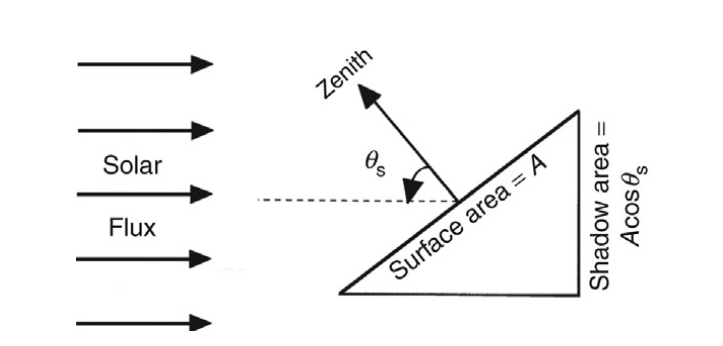

A partir de la Figura anterior podemos escribir el flujo solar por unidad de área como:

\begin{equation}
Q = S_0 \bigg(\frac{\overline{d}}{d}\bigg)^2 cos \theta _s
\label{eq:qins}
\end{equation}

donde $\theta_s$ es el ángulo cenital, $\overline{d}$ es la distancia promedio entre un planeta y el Sol, para el caso terrestre $\overline{d}=$1.5$\times$10$^{11}$ m, y $d$ es la distancia real que hay entre los dos cuerpos en un punto determinado del año, o día del año ($d_n$). 

La multiplicación por la razón entre la distancia promedio y la distancia real, $\frac{\overline{d}}{d}$, es necesaria para ajustar el flujo solar a las variaciones en la distancia entre el planeta y el Sol a lo largo del año, ya que la intensidad de la radiación solar disminuye conforme aumenta la distancia. Este parámetro varía en torno al valor de 1, reflejando pequeñas fluctuaciones en la distancia que influyen en la cantidad de radiación solar que llega a la superficie terrestre en diferentes épocas del año.


#### Distancia Sol-Tierra

Seguramente sabes que la órbita terrestre alrededor del Sol no es circular, si no que es una elipse. Una órbita elíptica tiene varias implicaciones, la primera de ellas que la distancia entre los cuerpos no es constante. La segunda, producto del hecho de que el Sol no es el centro de la órbita sino uno de los focos, es que hay sección del año donde la Tierra está más cerca del Sol, aunque sea ligeramente. Es por esto que es muy importante calcular bien la distancia Tierra-Sol.

El día del año ($d_n$) puede ser escrito en unidades de radianes a través de la ecuación:

\begin{equation}
\theta_d = \frac{2\pi d_n}{365}
\end{equation}

Finalmente, la posición del planeta con respecto al Sol se puede escribir también como función del día del año con una serie, que en particular es una serie de Fourier (por el uso de senos y cosenos):
\begin{equation}
 \bigg(\frac{\overline{d}}{d}\bigg)^2 = \sum_{n=0}^2 a_n cos(n\theta_d) + b_n sen(n\theta_d)
\end{equation}


Los coeficientes vienen del libro de Hartmann: 

Ahora escribimos estas dos ecuaciones en Python usando las funciones trigonométricas: `np.sin`, `np.cos`, `np.pi`, que seguro adivinarás de qué tratan.

Nota muy bien que las funciones trigonométricas de NumPy esperan los argumentos en radianes, no en grados. Para grados es otra función la que hay que usar.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

In [9]:
def theta_d(day):
    return 2*np.pi*day/365
def distance_to_sun(day):
    ans=[1.00011,0.034221,0.000719]
    bns=[0,0.001280,0.000077]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma

Convertir el día del año a radianes no es el gran cálculo, sigue siendo una línea, sólo que la línea ha cambiado a estar en unidades de radianes, que es la intención fundamental de este cálculo.

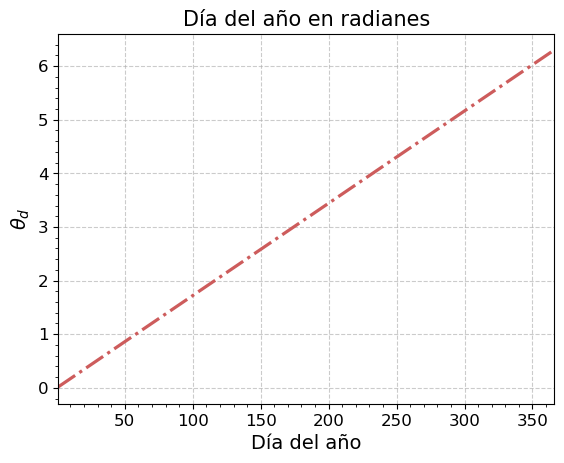

In [10]:
days=np.arange(1,366)
plt.plot(days,theta_d(days),c='indianred',linestyle='-.',linewidth=2.3)
lineplot_setup(1,366,xlab='Día del año',ylab=r'$\theta_d$',
               ymin=None,ymax=None,title='Día del año en radianes')

Vamos a escribir un ejemplo de cómo se calcularía la distancia Sol Tierra para el día 74 del año, que cae alrededor del 12 de marzo. 

In [11]:
print(distance_to_sun(74))

1.0107942593442738


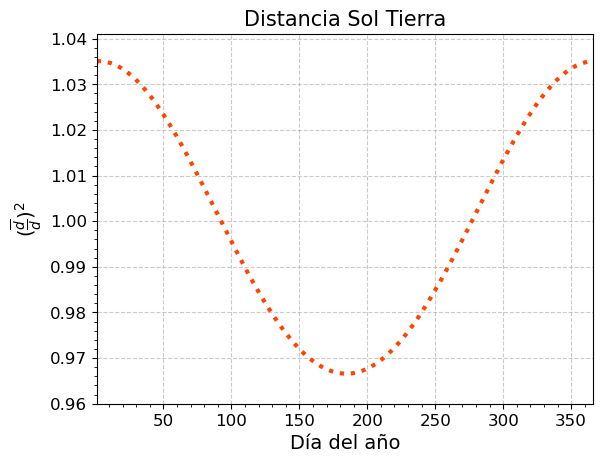

In [12]:
plt.plot(days,distance_to_sun(days),c='orangered',linestyle=':',linewidth=3)
lineplot_setup(1,366,xlab='Día del año',ylab=r'$(\frac{\overline{d}}{d})^2$',
               ymin=0.96,ymax=1.041,title='Distancia Sol Tierra')

#### Ángulo de declinación solar

El ángulo de declinación solar ($\delta$) se puede estimar a partir de conocer el día del año $d$ que calculamos arriba. Este ángulo $\delta$ es el ángulo entre el ecuador y una línea que va del centro de la Tierra al centro del Sol. También es la latitud del punto en la superficie directamente debajo del Sol a mediodía. 
Para aproximar $\delta$ podemos utilizar la serie de Fourier:
 
\begin{equation}
\delta = \sum_{n=0}^3 a_n cos(n\theta_d) + b_n sin(n\theta_d).
\end{equation}

cuyos coeficientes podemos encontrar en la presentación.

A continuación escribimos la función en Python para obtener el ángulo de declinación solar.

In [13]:
def delta(day):
    ans=[0.006918,-0.399912,-0.006758,-0.002697]
    bns=[0,0.070257,0.000907,0.001480]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma

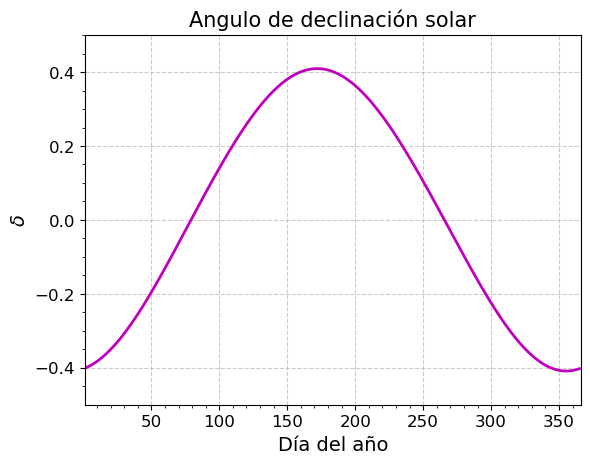

In [14]:
plt.plot(days,delta(days),c='m',linewidth=2)
lineplot_setup(1,366,xlab='Día del año',ylab=r'$\delta$',
               ymin=-0.5,ymax=0.5,title='Angulo de declinación solar')

Podemos también graficar ahora estos valores pero convirtiéndolos a grados, anteriormente estaban en radianes.

Le vamos a cambiar, otra vez el color a las líneas, si quieres probar con otros colores, aquí están todos los colores "default" posibles: https://matplotlib.org/stable/gallery/color/named_colors.html

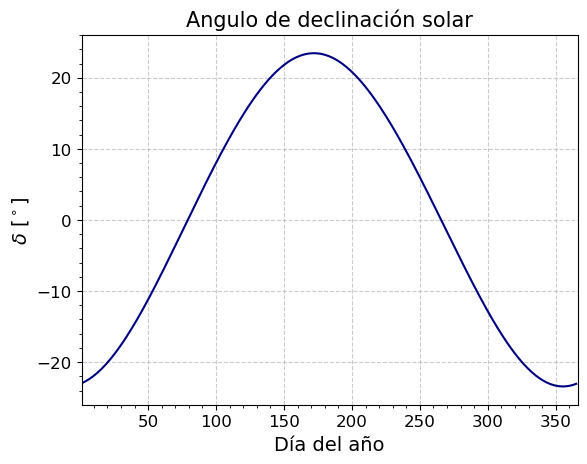

In [15]:
plt.plot(days,delta(days)*180/np.pi,c='navy')
lineplot_setup(1,366,xlab='Día del año',ylab=r'$\delta$ [$^\circ$]',
               ymin=-26,ymax=26,title='Angulo de declinación solar')

#### El ángulo horario

El ángulo horario es el ángulo hora cuando ocurre el atardecer y el amanecer, es decir, a mediodía el ángulo cenital depende solamente de la latitud y el ángulo de declinación solar. El atardecer y amanecer occurren cuando el ángulo cenital es de 90$^\circ$. 
Si el coseno del ángulo cenital es negativo eso quiere decir que el Sol se encuentra por debajo del horizonte y la superficie está en oscuridad. Sabiendo esto, podemos definir un ángulo horario especial, que llamaremos $h_0$ y que es el ángulo horario equivalente a cuando el ángulo cenital es de 90$^\circ$. Dicho de otra manera un poco más directa, es la medidad del ángulo horario que ocurre entre el atardecer y oscurecer y que nos mide la **longitud temporal de 1 día solar**.

La hora del atardecer y del amanecer se relaciona con el ángulo de declinación solar y la latitud. 
Seguramente te has dado cuenta que los días empiezan a durar más en estos días de febrero. La manera de relacionar esto es a través de la ecuación:

\begin{equation}
cos\, h_0 = -tan\phi tan\delta 
\end{equation}

Por lo que despejando $h_0$:

\begin{equation}
 h_0 = arccos \bigg( -tan\phi tan\delta  \bigg)
\end{equation}

In [16]:
def hour_angle(phi,day):
    argument=np.tan(np.deg2rad(phi))*np.tan(delta(day))
    # np arc cos es el arco coseno de un argumento
    h0=np.arccos(-argument)
    return h0

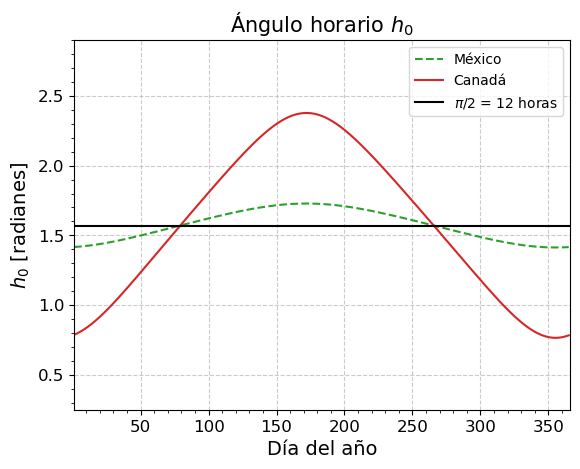

In [17]:
h_0_Mex=hour_angle(19.9,days)
h_0_Canada=hour_angle(59,days)
plt.plot(days,h_0_Mex,c='tab:green',linestyle='--',label='México')
plt.plot(days,h_0_Canada,c='tab:red',linestyle='-',label='Canadá')
plt.axhline(np.pi/2,c='k',label='$\pi/2$ = 12 horas')
lineplot_setup(1,366,xlab='Día del año',ylab=r'$h_0$ [radianes]',
               ymin=0.25,ymax=2.9,title='Ángulo horario $h_0$')
plt.legend()


Ahora bien, el ángulo cenital es más difícil de calcular de lo que parece. Pero podemos escribir una ecuación analítica que nos diga el ángulo cenital como función de tres otros ángulos ($\theta_s(\phi,\delta,h)$), el ángulo de declinación solar ($\delta$), el ángulo horario ($h$) y la latitud ($\phi$). En la presentación tenemos un esquema relacionando estos tres ángulos y la derivación de su relación se encuentra en el apéndice A de Hartmann. Podemos escribir la ecuación del ángulo cenital entonces como:


\begin{equation}
cos\theta_s = sin\phi sin\delta +cos\phi cos\delta cos h
\label{eq:cenital}
\end{equation}

Uniendo todo esto, podemos obtener que: 

\begin{align}
Q = S_0 \bigg(\frac{\overline{d}}{d}\bigg)^2 \bigg[sin\phi sin\delta +cos\phi cos\delta cos h \bigg]
\end{align}

 Esta ecuación nos dice cuánto es la insolación en un instante en un punto del planeta sólo como función de su latitud, y su día del año, una vez que consideramos todas las ecuaciones anteriores. Es decir, la cantidad de radiación que llega depende fundamentalmente de estos dos factores:
 
 - ¿Dónde estamos en la Tierra? ($\phi$).
 - ¿Qué día del año es? ($d$)

In [18]:
def Q(d,zenith,S_0=1367):
    d_mean = 1.5e11
    distance = (d_mean/d)**2
    Qvar = S_0*distance*np.cos(np.deg2rad(zenith))
    return Qvar


Ahora bien, si queremos obtener una ecuación que nos diga cuánto vale el valor integrado de la insolación para un día sobre una superficie plana, es decir la cantidad de radiación promedio que llega en un día a la Tierra tenemos que integrar la ecuación siguiente desde el amanecer $-h_0$ hasta el atardecer $h_0$, es decir:

\begin{align}
\int Q dh = S_0 \bigg(\frac{\overline{d}}{d}\bigg)^2 \bigg[ \int_{-h_0}^{h_0} sen\phi sen\delta \, dh + \int_{-h_0}^{h_0} cos\phi cos\delta cos h \, dh \bigg]
\label{eq:qins}
\end{align}

En las notas vienen los pasos para llegar a la solución:

\begin{align}
\therefore \bar{Q}= \frac{S_0}{\pi} \bigg(\frac{\overline{d}}{d}\bigg)^2 [h_0 sen\phi sen\delta+cos\phi cos\delta sen h_0]
\label{eq:qmean}
\end{align}
 
 En resumen, la insolación promedio diaria se modela considerando cómo estos factores afectan la cantidad de radiación solar que llega a un lugar específico en la Tierra en un día dado. 
 Este es un modelo simple de clima, que nos dice para 1D como se distribuye una variable, en este caso la insolación.

In [19]:
def Q_mean(phi,day,S_0=1367):
    # estimamos la distancia al sol para este dia particular
    d=distance_to_sun(day)
    # para este dia tambien obtenemos el angulo de declinacion solar
    Delta = delta(day)
    # ifs especiales para cuando no hay insolacion. 
    if (np.pi/2)-Delta<np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif -(np.pi/2)-Delta>np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif np.deg2rad(phi)>(np.pi/2)+Delta:
        h_0=0
    elif np.deg2rad(phi)<-(np.pi/2)+Delta:
        h_0=0
    else:
        h_0=hour_angle(phi,day)
    
    # calculamos la ecuacion especial
    Q_mean = (S_0/np.pi)*d*((h_0)*np.sin(np.deg2rad(phi))*np.sin(Delta)+np.cos(np.deg2rad(phi))*np.cos(Delta)*np.sin(h_0))
    return Q_mean

Podemos evaluar la función para un ejemplo de latitud, parecida a la de Jalisco o Durango y el día del año 180.

In [20]:
phi=22
day=180
Q_mean(phi,day)

461.42389562060214

Ahora repetimos el procedimiento que hicimos varias celdas arribas, para evaluar una función dado un par de argumentos, en este caso $\bar{Q}(\phi,d)$. 

En este caso tenemos que iterar sobre los objetos de `latitudes` y `days`.

In [21]:
latitudes=np.arange(-90,90,0.5)
days=np.arange(1,366)
Q_all = np.zeros((len(latitudes),len(days)))
for ilat,lat in enumerate(latitudes):
    for idd,day in enumerate(days):
        Q_all[ilat,idd]=Q_mean(lat,day)
print(np.max(Q_all))

562.1207043718584


Ya que tenemos esta matriz llena de valores podemos graficar el resultado. Se debe ver como la gráfica de Hartmann de la presentación, esto es $\bar{Q}$.

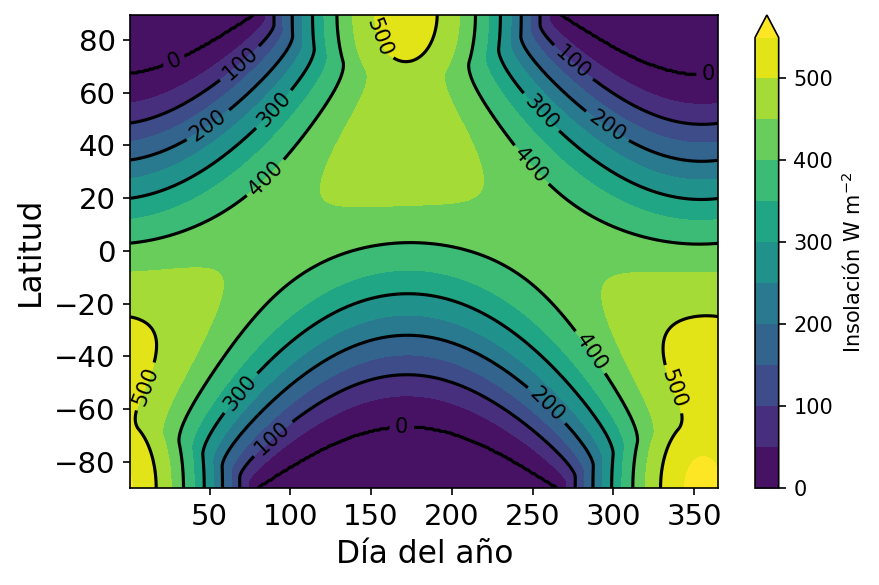

In [24]:
plt.figure(figsize=(6,4),dpi=150)
plt.contourf(days,latitudes,Q_all,levels=np.arange(0,551,50),extend='max')
plt.colorbar(label='Insolación W m$^{-2}$')
cc=plt.contour(days,latitudes,Q_all,levels=np.arange(0,701,100),colors='k')
plt.clabel(cc)
plt.xlabel('Día del año',fontsize=15)
plt.ylabel('Latitud',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Qday.png')
